# California Housing Prices Analysis

## 1. Business Problem Understanding

### a. Context
Harga rumah di California telah menjadi topik yang menarik bagi banyak peneliti dan analis. Data yang digunakan dalam analisis ini berasal dari sensus California tahun 1990, yang menyediakan kumpulan data pengenalan yang dapat diakses untuk mengajari orang-orang tentang dasar-dasar pembelajaran mesin.

### b. Problem Statement
Rumah atau properti merupakan kebutuhan utama semua orang, California merupakan salah satu area incaran paling strategis bagi para calon pembeli, Selain untuk kebutuhan utama, rumah juga dapat dijadikan sebuah asset investasi bagi pembeli, Harga pasar pada industri properti (rumah khususnya) di California sangat fluktuatif dan sulit untuk diprediksi.. Hal ini menjadi penting untuk para stakeholders khususnya California’s Real Estate Agency untuk bisa mengetahui faktor apa saja yang dapat mempengaruhi fluktuasi harga dan bagaimana prediksi terhadap harga rumah yang akan dibeli atau diinvestasikan.

### c. Goals
Tujuan utama dari analisis ini adalah untuk membangun model pembelajaran mesin yang dapat memprediksi nilai median rumah secara akurat. Hal ini dapat membantu pemangku kepentingan seperti agen real estat, calon pembeli rumah, dan pembuat kebijakan untuk mengambil keputusan yang tepat.
Specific: Membangun model machine learning yang dapat memprediksi nilai median rumah di California.
Measurable: Menggunakan metrik Mean Squared Error (MSE) dan R-squared untuk mengukur kinerja model.
Achievable: Menggunakan dataset dari sensus California tahun 1990 dan beberapa model machine learning yang telah terbukti efektif dalam prediksi.
Relevant: Memberikan alat prediksi yang berguna bagi stakeholders dan para calon pembeli.
Timebound: Mencapai model prediksi yang optimal dalam waktu 3 bulan.

### d. Analytic Approach
Kami akan menggunakan beberapa model pembelajaran mesin, Linear Regression, Decision Tree, dan Random Forest, untuk memprediksi nilai median rumah. Kami akan mengevaluasi model ini berdasarkan metrik kinerjanya dan memilih model terbaik untuk tujuan kami.

### e. Metric Evaluation
Model akan dievaluasi menggunakan Mean Squared Error (MSE) dan metrik R-squared untuk menentukan akurasi dan performanya.

## 1. Introduction
Notebook ini memberikan analisis harga rumah di California menggunakan berbagai model Machine learning.

## 2. Data Loading and Cleaning

In [4]:
import pandas as pd

# Load  dataset
file_path = r'C:\Users\Andrew\Downloads\data_california_house.csv'
california_housing_data = pd.read_csv(file_path)

# Fill missing values di 'total_bedrooms' dengan median 
california_housing_data = california_housing_data.assign(
    total_bedrooms=california_housing_data['total_bedrooms'].fillna(california_housing_data['total_bedrooms'].median())
)

california_housing_data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52,112,28.0,193,40,1.9750,INLAND,47500
1,-122.21,37.77,43,1017,328.0,836,277,2.2604,NEAR BAY,100000
2,-118.04,33.87,17,2358,396.0,1387,364,6.2990,<1H OCEAN,285800
3,-118.28,34.06,17,2518,1196.0,3051,1000,1.7199,<1H OCEAN,175000
4,-119.81,36.73,50,772,194.0,606,167,2.2206,INLAND,59200


## 3. Exploratory Data Analysis


### Linear Regression
Linear Regression adalah model statistik yang digunakan untuk memprediksi nilai target dengan menemukan hubungan linear antara variabel input dan variabel output. Model ini meminimalkan jumlah kuadrat dari perbedaan antara nilai yang diprediksi dan nilai yang sebenarnya.

### Decision Tree
Decision Tree adalah model prediksi yang menggunakan struktur pohon keputusan untuk memetakan fitur input ke nilai target. Model ini membagi data ke dalam subset yang lebih kecil berdasarkan fitur yang paling informatif hingga mencapai daun yang merepresentasikan nilai target.

### Random Forest
Random Forest adalah ensemble model yang menggabungkan banyak pohon keputusan untuk meningkatkan akurasi prediksi. Model ini mengurangi overfitting dengan menggabungkan hasil dari beberapa pohon yang dilatih pada subset data yang berbeda.


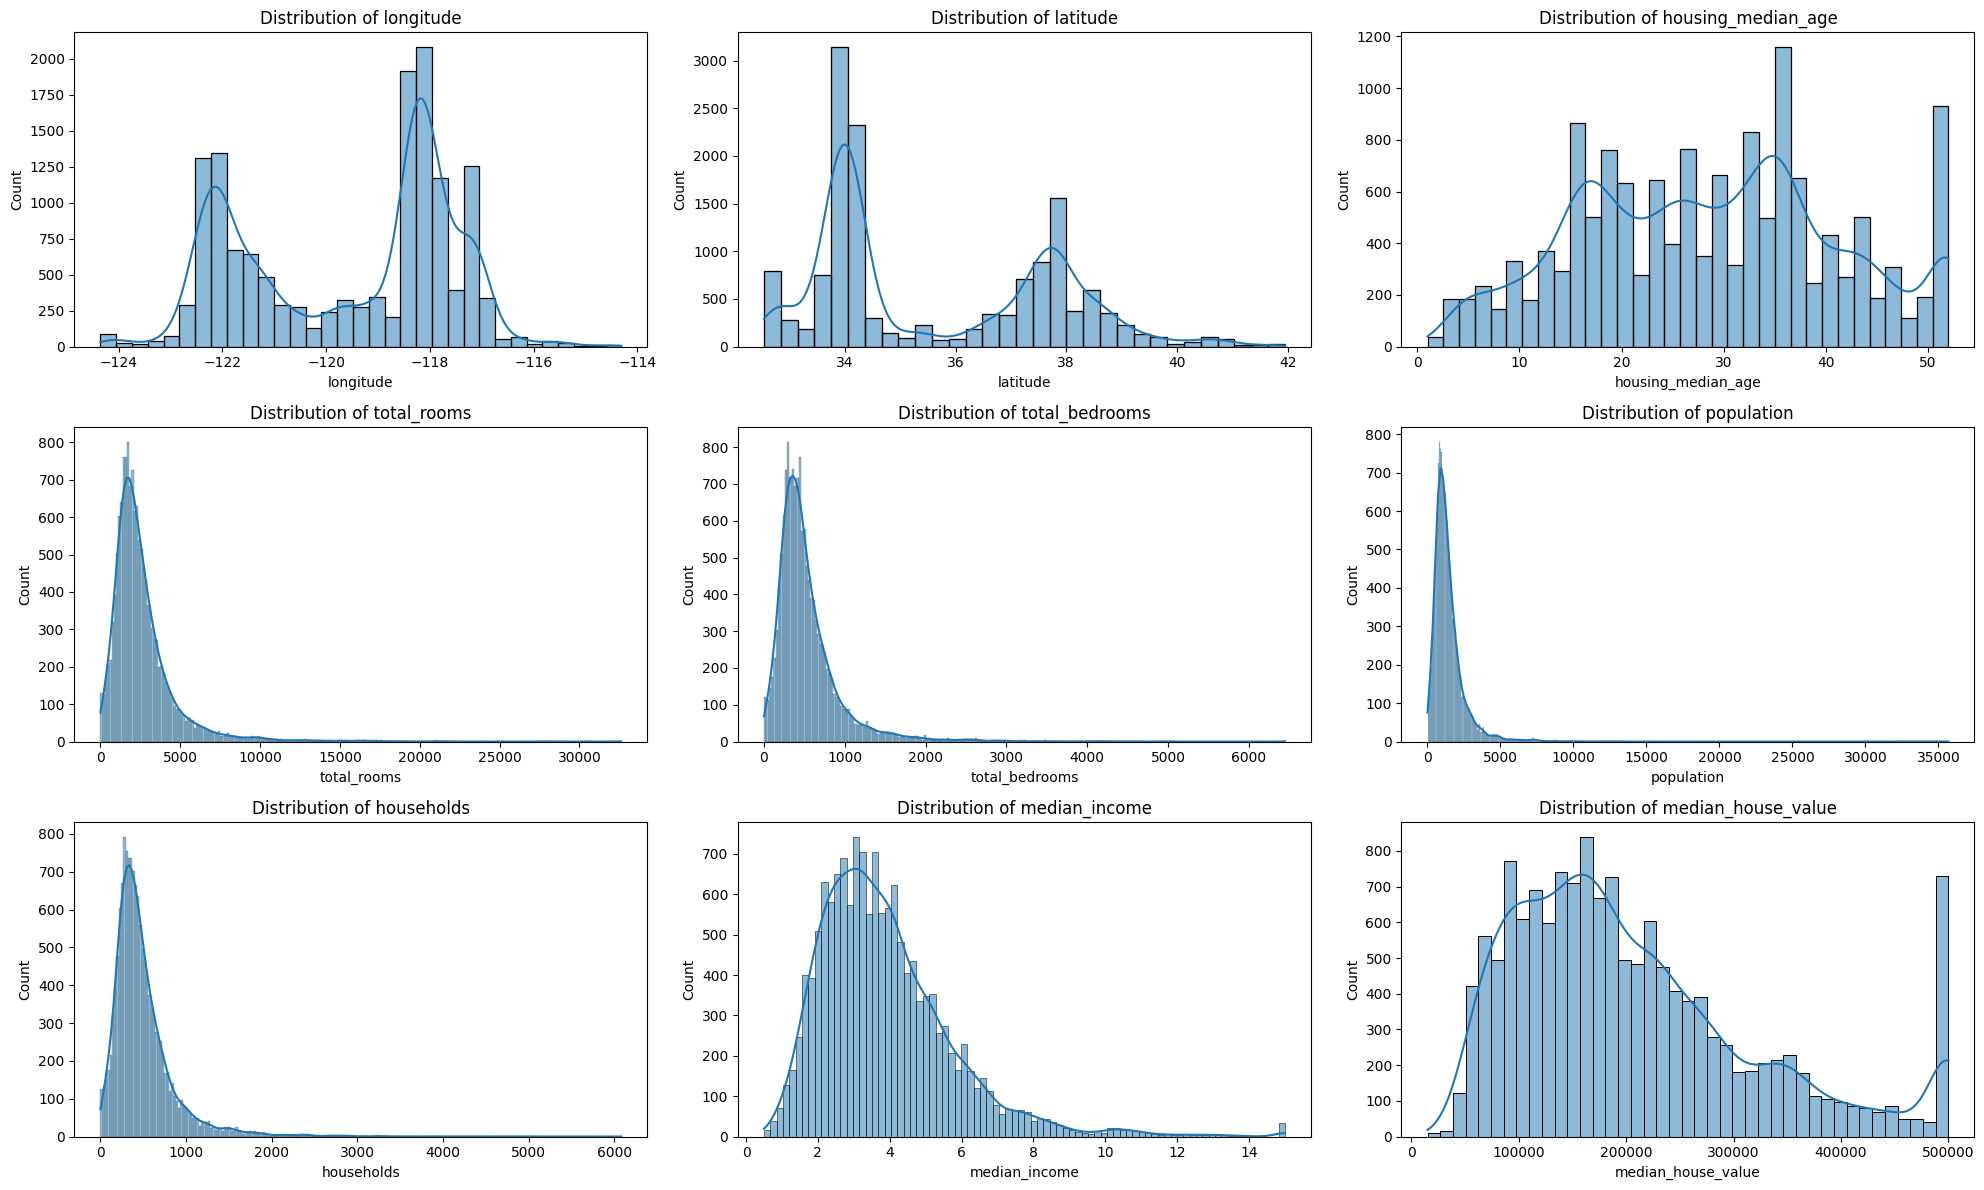

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the matplotlib figure
plt.figure(figsize=(20, 12))

# Plotting histograms for numerical features
numeric_features = california_housing_data.select_dtypes(include=['float64', 'int64']).columns
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(california_housing_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

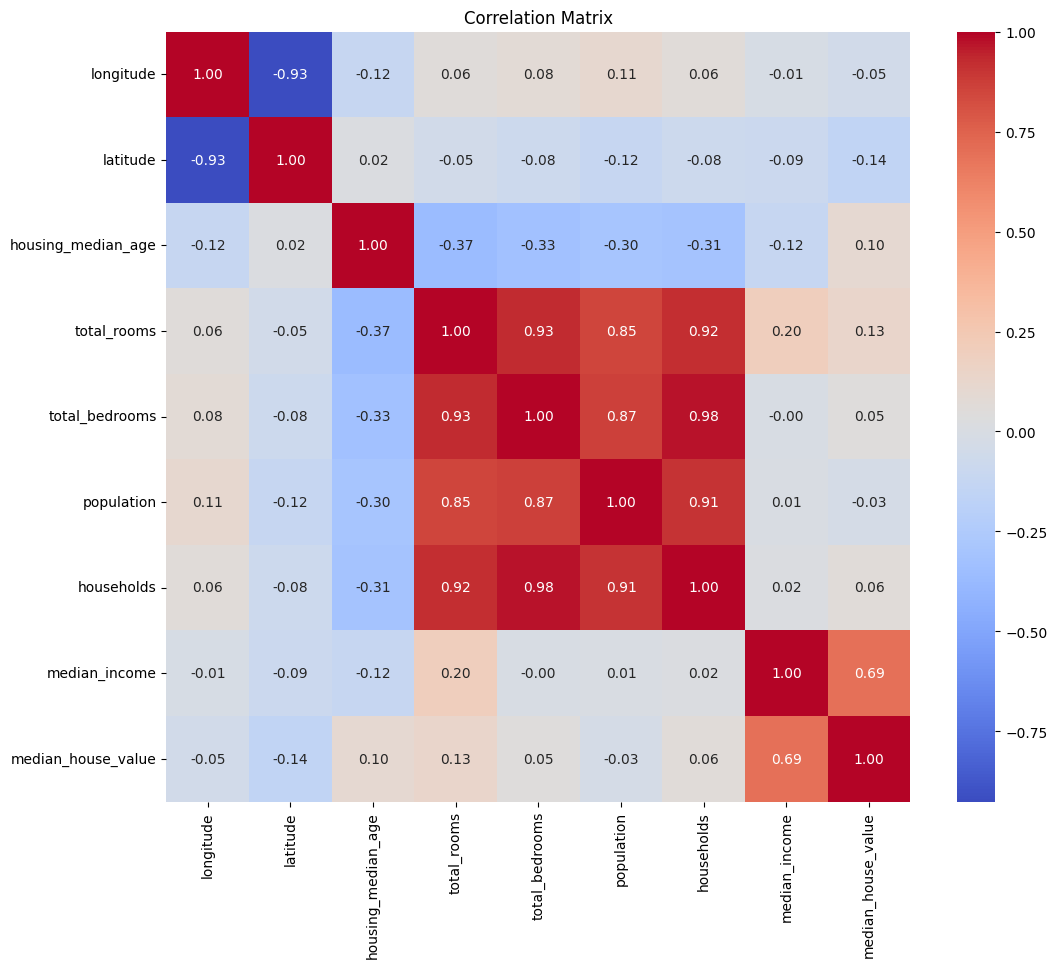

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop categorical column 
california_housing_numeric = california_housing_data.drop(columns=['ocean_proximity'])

# Plotting correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = california_housing_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## 4. Data Preprocessing

In [62]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Features dan target variable
X = california_housing_data.drop('median_house_value', axis=1)
y = california_housing_data['median_house_value']

# Definisi numerical dan categorical column 
numeric_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
categorical_features = ['ocean_proximity']

# Membuat column transformer dengan normalization dan one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Preprocessing the data
X_processed = preprocessor.fit_transform(X)

X_processed.shape

(14448, 13)

## 5. Model Training and Evaluation

Linear Regression: MSE = 4964823650.892547, R-squared = 0.6281319499136326
Decision Tree: MSE = 5183186280.116955, R-squared = 0.6117764676545971
Random Forest: MSE = 2427354086.770494, R-squared = 0.8181898301756912


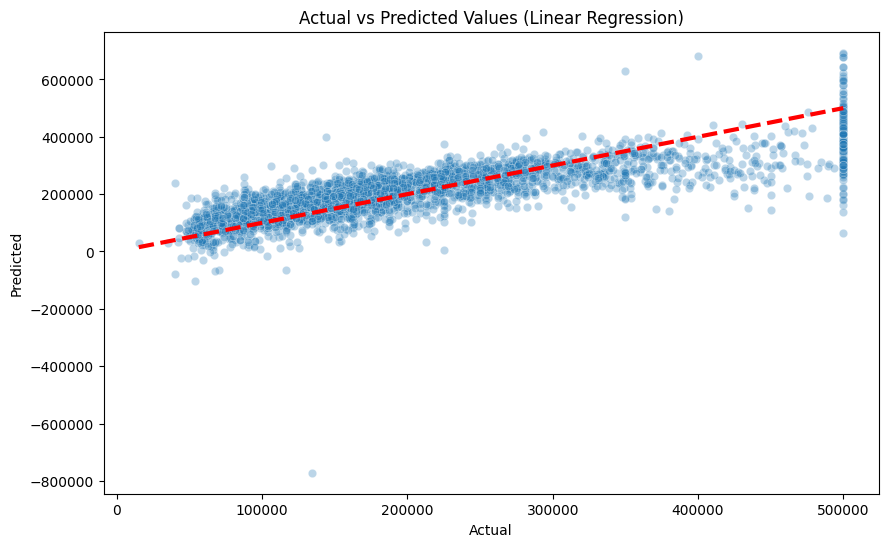

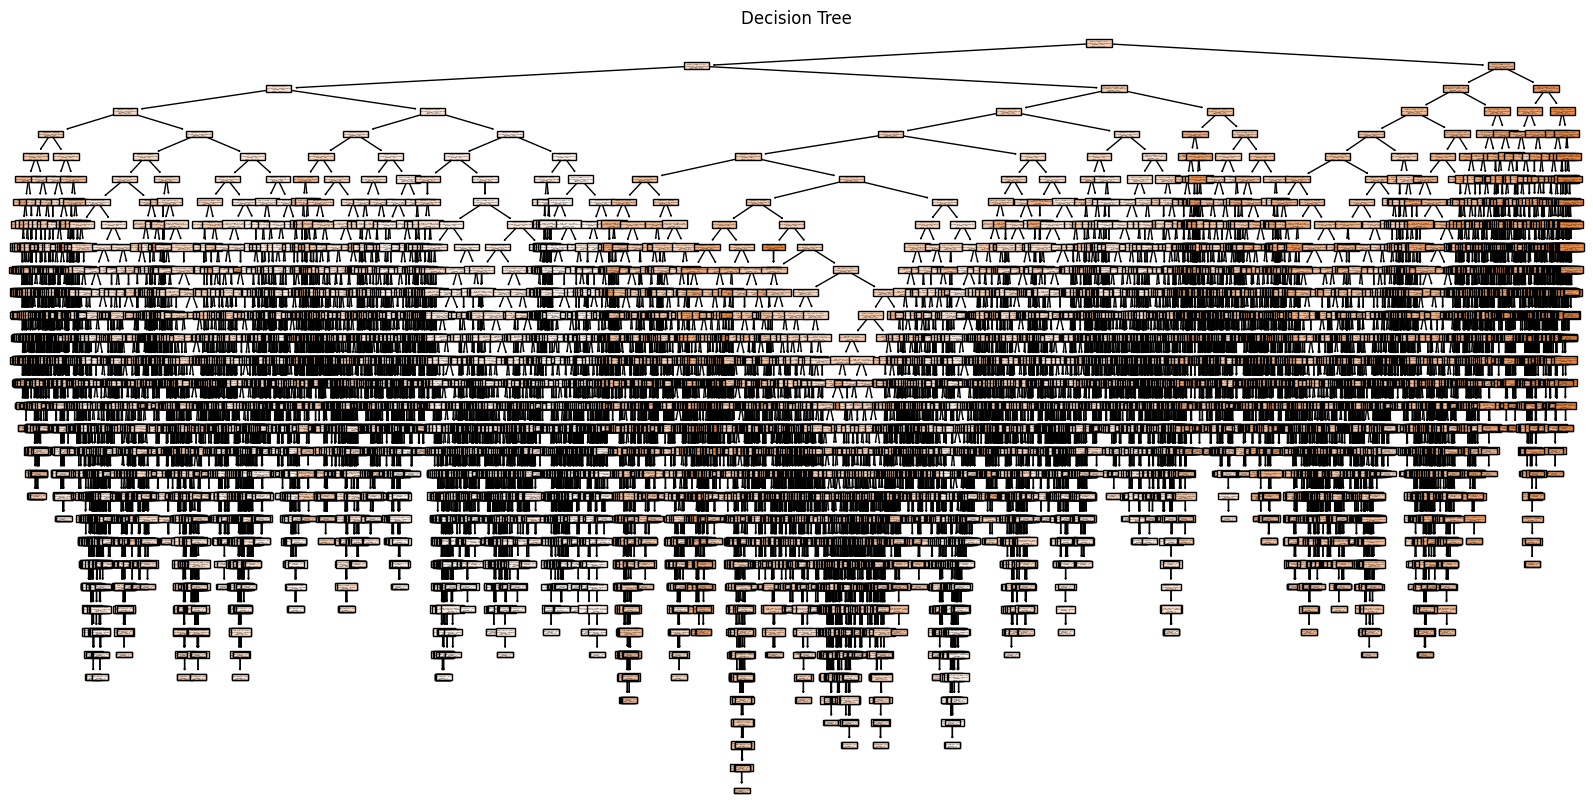

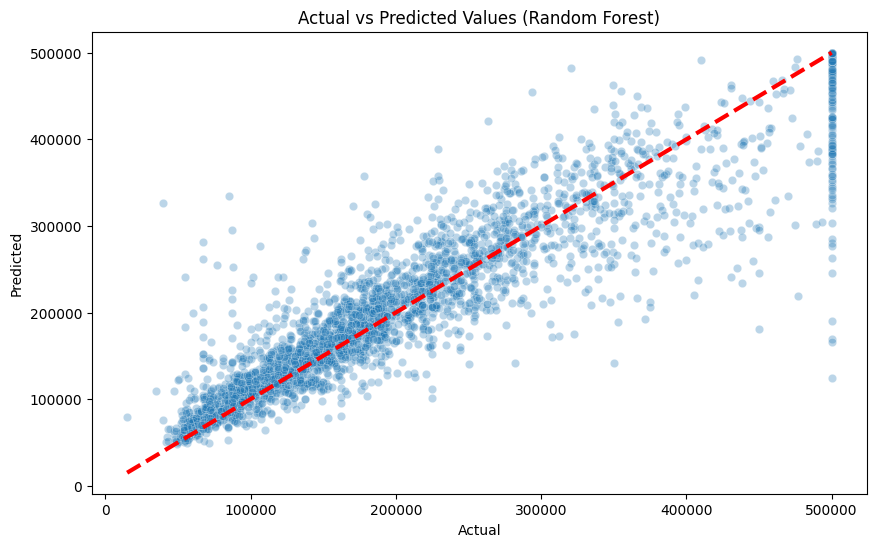

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = r'C:\Users\Andrew\Downloads\data_california_house.csv'
california_housing_data = pd.read_csv(file_path)

# Fill missing values in 'total_bedrooms' 
california_housing_data['total_bedrooms'] = california_housing_data['total_bedrooms'].fillna(california_housing_data['total_bedrooms'].median())

# Menyiapkan feature dan target variable
X = california_housing_data.drop(columns=['median_house_value', 'ocean_proximity'])
y = california_housing_data['median_house_value']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pastikan X_train dan X_test adalah DataFrame
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression: MSE = {mse_lr}, R-squared = {r2_lr}")
print(f"Decision Tree: MSE = {mse_dt}, R-squared = {r2_dt}")
print(f"Random Forest: MSE = {mse_rf}, R-squared = {r2_rf}")

# Plot actual vs predicted values Linear Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.show()

# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X_train.columns)
plt.title('Decision Tree')
plt.show()

# Plot actual vs predicted values Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.show()

Decision Tree: MSE = 4237804400.152883, R-squared = 0.682586095752067


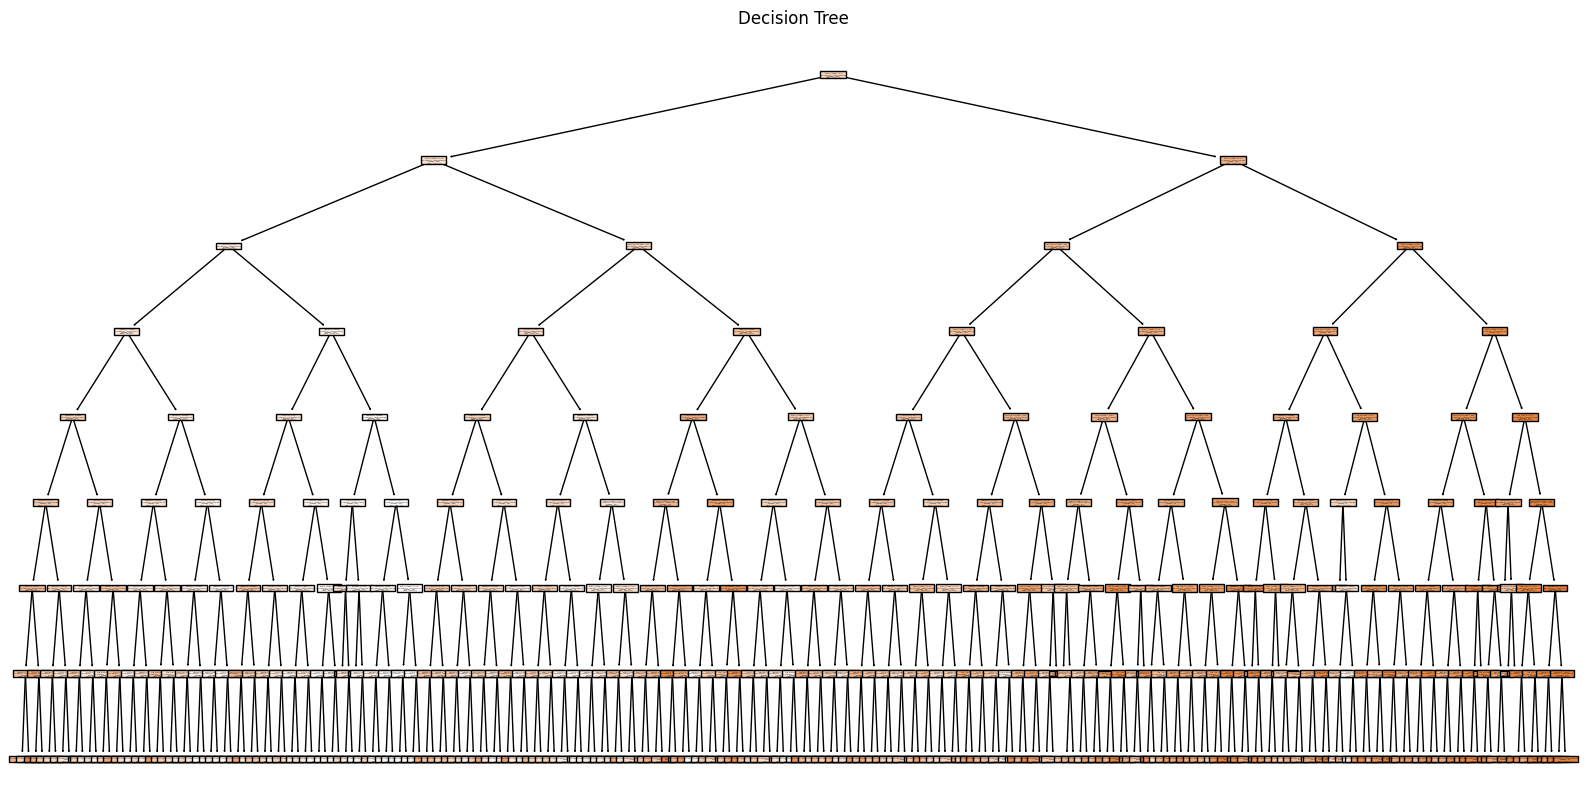

In [70]:
# Decision Tree dengan limit depth
dt_model = DecisionTreeRegressor(random_state=42, max_depth=8)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree: MSE = {mse_dt}, R-squared = {r2_dt}")

# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X_train.columns)
plt.title('Decision Tree')
plt.show()

## 6. Results and Visualization

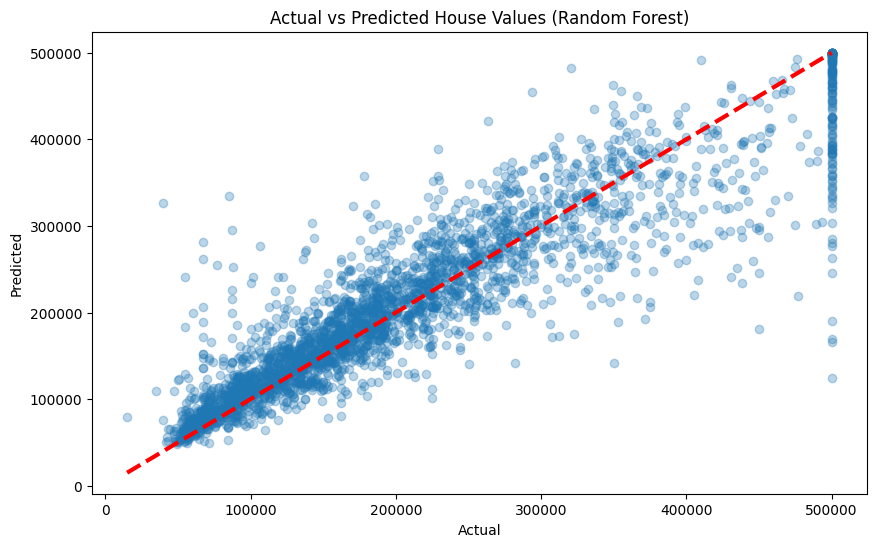

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Values (Random Forest)')
plt.show()

MSE: 2,427,354,086.770494
R-squared: 0.8181898301756912
Penjelasan: Model Random Forest memberikan hasil terbaik dengan MSE yang paling rendah dan R-squared yang paling tinggi, menunjukkan bahwa model ini dapat menjelaskan sekitar 81.82% dari variabilitas data

## 6. Conclusion
- Kesimpulannya, berdasarkan pemodelan yang telah dilakukan, kami telah membangun model machine learning yang dapat memprediksi nilai median rumah di California dengan akurasi yang memuaskan. Model Random Forest memberikan hasil terbaik dengan MSE sebesar 2,427,354,086.770494 dan R-squared sebesar 0.8181898301756912.

- Ini berarti model Random Forest mampu menjelaskan sekitar 81.82% variansi dalam nilai median rumah, yang sangat signifikan. Fitur-fitur yang paling berpengaruh terhadap median_house_value adalah median_income dan housing_median_age, menunjukkan bahwa pendapatan median dan usia rumah adalah faktor penting dalam menentukan harga rumah.

- Namun, terdapat beberapa bias yang dapat mempengaruhi akurasi prediksi. Bias ini mungkin disebabkan oleh kurangnya fitur yang lebih mendetail mengenai properti dan faktor-faktor eksternal lainnya yang mempengaruhi harga rumah, seperti kondisi lingkungan, fasilitas publik di sekitar, dan lainnya.


### 7. Recommendation
- Mengecek Prediksi dengan Nilai Error Tinggi:
Lakukan analisis terhadap prediksi yang memiliki nilai error tinggi. Kelompokkan error tersebut ke dalam grup overestimation dan underestimation. Pilih 5% error paling ekstrem untuk tiap grup dan analisis hubungan error tersebut dengan tiap variabel independen. Hal ini dapat membantu dalam memahami variabel mana yang menyebabkan error tinggi dan memungkinkan dilakukan training ulang dengan feature engineering tambahan.

- Penambahan Fitur yang Lebih Korelatif:
Tambahkan fitur yang lebih korelatif dengan median_house_value, seperti luas bangunan, kondisi rumah, dan jarak ke pusat kota. Penambahan data terkini mengenai pasar perumahan di California juga akan sangat membantu dalam meningkatkan kapasitas prediksi model.

- Menggunakan Model yang Lebih Kompleks:
Jika ada tambahan data dan fitur, pertimbangkan penggunaan model yang lebih kompleks seperti Gradient Boosting Machines atau Neural Networks. Model yang lebih kompleks mungkin dapat menangkap hubungan non-linear dengan lebih baik, tetapi pastikan bahwa jumlah data mencukupi untuk melatih model tersebut.

- Memanfaatkan Model untuk Pengembangan Lainnya:
Model yang sudah dibangun ini bisa dimanfaatkan untuk pengembangan model lainnya, seperti memprediksi update harga rumah setelah renovasi atau pembangunan baru. Data tambahan dari lembaga real estate yang menyediakan informasi lebih mendetail tentang properti dan review dari pembeli dapat digunakan untuk meningkatkan akurasi model.

### 8. Relevance and Implementation 
Model prediksi ini sangat relevan bagi para stakeholders, khususnya agen real estate di California. Dengan alat prediksi ini, agen real estate dapat memberikan estimasi harga rumah yang lebih akurat kepada calon pembeli dan investor, membantu mereka dalam membuat keputusan yang lebih baik. Selain itu, model ini dapat digunakan untuk memantau fluktuasi harga rumah di masa depan dan mengidentifikasi tren pasar yang penting.